# Dog Breed classification 🐕
This notebook builds a multi-class dog breed image classifier with TensorFlow 2.7 and TensorFlow Hub .12.

## Problem

Determine the breed of a dog from an image.

Customers want a simple alternative for identifying the breed of their dog.

## Data 

The data is a small subset from Kaggle's "Dog Breed Identification": https://www.kaggle.com/c/dog-breed-identification/overview.

There are 3 labeled dog breeds instead of 120 for right now.

## Evaluation 

The evaluation is a file with prediction probablilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features

The data has 60 images in the training set and 60 in the test set of about 6 different dog breeds.


# Git

In [13]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/BreedIdentifier/breedidentifier
%ls -a

!git config --global user.email "madbrow007@gmail.com"
!git config --global user.name {username}

#!git status
#!git reset
#!git remote remove origin 
#!git remote add origin 
#!git remote -v
# %cd logs
#!git pull origin master
#!git add logs/
#!git commit -m "Adding logs file"

#!git push origin master


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/BreedIdentifier/breedidentifier
BreedIdentifier.ipynb  logs/                      new_test/
.git/                  new_labels.csv             new_train/
.ipynb_checkpoints/    new_sample_submission.csv  README.md
/content/drive/MyDrive/BreedIdentifier/breedidentifier/logs


# Setting up environment

In [3]:
# TensorFlow 2.7 and TensorFlow Hub import
import tensorflow as tf
import tensorflow_hub as hub

# Transforming the data (images) into tensors

In [4]:
import pandas as pd
#viewing labels

image_labels = pd.read_csv("/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_labels.csv")
print(image_labels.describe())
print(image_labels.head())

                                      id       breed
count                                 60          60
unique                                60           3
top     087b211f15ad8095ba90c0be54c1c30d  great_dane
freq                                   1          20
                                 id              breed
0  087b211f15ad8095ba90c0be54c1c30d         great_dane
1  058ea5b467d08ed978658dc1ad85fb7d        maltese_dog
2  07bbf36ce2c7407751219804b3d187ec  yorkshire_terrier
3  0b86485ef980b0b4999e7ede1f90999e         great_dane
4  022b34fd8734b39995a9f38a4f3e7b6b        maltese_dog


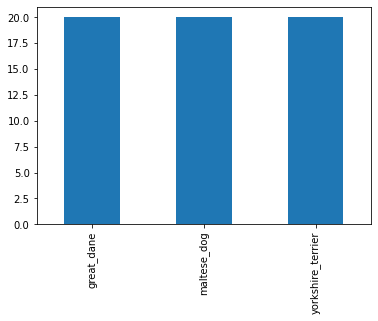

In [5]:
#viewing amount of images per breed on a bar graph
image_labels["breed"].value_counts().plot.bar()

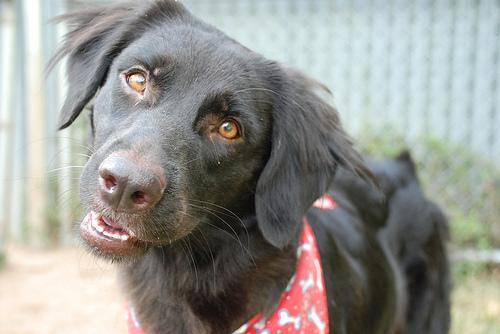

In [6]:
#viewing images

from IPython.display import Image
Image("/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_test/0a342feb5c2100a12bcd15326cf266c6.jpg")

## Listing the images and their labels

In [7]:
import numpy as np
#Filename id list "filenames"
image_paths = ["/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/" + fname  + ".jpg"  for fname in image_labels["id"]]

#viewing
#image_paths[:5]

labels = image_labels["breed"]
labels = np.array(labels)


#boolean array/ boolean array as integer
unique_labels = np.unique(labels)
labels[0] == unique_labels

boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

print(labels[1])
print(np.where(unique_labels == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[1].astype(int))

maltese_dog
(array([0]),)
0
[0 1 0]


#Validation  Set

In [8]:
# file paths to the images
x = image_paths
# boolean numpy label(fileid/breed) representation
y = boolean_labels

# "num_images"
IMAGE_SUBSET = 50 #@param {type:"slider", min:10, max:60, step:5}

In [9]:
from sklearn.model_selection import train_test_split

# DELETE ME.... train_images train_labels
x_train, x_val, y_train, y_val = train_test_split(x[:IMAGE_SUBSET], y[:IMAGE_SUBSET], test_size=0.2, random_state=0)

# x are images and y are labels
len(x_train), len(x_val), len(y_train), len(y_val)

(40, 10, 40, 10)

In [10]:
x_train[:5], y_train[:5]

(['/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/33ca93ae41a388e66586a7795fef8650.jpg',
  '/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/23418e1e584a9ac9e51c1ab2c804c1a7.jpg',
  '/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/1548eb783093ac6bdf011d07f3370a36.jpg',
  '/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/2071036a0cb133584c9b917b1a7e90d7.jpg',
  '/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/21eec2cb15c5b4948605bf5d2c9ab87e.jpg'],
 [array([ True, False, False]),
  array([False, False,  True]),
  array([False, False,  True]),
  array([False,  True, False]),
  array([ True, False, False])])

## Preprocessing image function

In [11]:
# image to NumPy array
from matplotlib.pyplot import imread
IMAGE_SIZE = 224

# For preprocessing each image
def preprocess_image(image_path, image_size = IMAGE_SIZE):
  """
  Reads in image file and converts it to a tensor
  """

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[image_size, image_size])

  return image

print(preprocess_image(image_paths[2]))

tf.Tensor(
[[[0.53333336 0.5019608  0.45882356]
  [0.5366597  0.5052872  0.4621499 ]
  [0.539486   0.50811344 0.4649762 ]
  ...
  [0.5526261  0.55654764 0.49380258]
  [0.56262255 0.5547794  0.4959559 ]
  [0.56262255 0.5547794  0.4959559 ]]

 [[0.5294118  0.49803925 0.44705886]
  [0.53309155 0.501719   0.4507386 ]
  [0.537442   0.5060695  0.4550891 ]
  ...
  [0.55814075 0.5620623  0.49931726]
  [0.57181376 0.5639706  0.5051471 ]
  [0.57181376 0.5639706  0.5051471 ]]

 [[0.5254902  0.49411768 0.4431373 ]
  [0.52920717 0.49783462 0.44685423]
  [0.5335402  0.50216764 0.45118722]
  ...
  [0.5644991  0.56842065 0.50567555]
  [0.5764706  0.5686275  0.50980395]
  [0.5764706  0.5686275  0.50980395]]

 ...

 [[0.34592852 0.35377166 0.3341638 ]
  [0.35016304 0.35800618 0.33839834]
  [0.35584408 0.36368722 0.34407938]
  ...
  [0.4339461  0.44178924 0.38688728]
  [0.43786767 0.44178924 0.38688728]
  [0.43786767 0.44178924 0.38688728]]

 [[0.34653252 0.35437566 0.33476782]
  [0.34901962 0.35686275 0

## Get tuple function

In [12]:
def get_image_tuple(image_path, label):
  """
  returns a tuple with a processed image and a label
  """
  image = preprocess_image(image_path)
  return image, label


## Create batches function

In [13]:
# Recommended batch size is under 32
BATCH_SIZE = 32

def create_batches(x, y = None, batch_size = BATCH_SIZE, test_data = False, validation_data = False):
  """
  Creates data batches in sizes of 32 by turning the data to tensor data sets and
  shuffling if training data.
  """

  # test data
  if test_data:
    dataset = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = dataset.map(preprocess_image).batch(BATCH_SIZE)

    print("data batch created for TEST data!")


  # validation data
  elif validation_data:
    dataset = tf.data.dataset.from_tensor_slices(tf.constant(x), tf.constant(y))
    data_batch = dataset.map(get_image_tuple).batch(BATCH_SIZE)

    print("data batch created for VALIDATION data!")


  # training data
  else:
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))

    dataset = dataset.shuffle(buffer_size=len(x))

    dataset = dataset.map(get_image_tuple)

    data_batch = dataset.batch(BATCH_SIZE)

    print("data batch created for TRAINING data!")

  return data_batch



train_data = create_batches(x_train, y_train)


data batch created for TRAINING data!


## Visualize data batches function

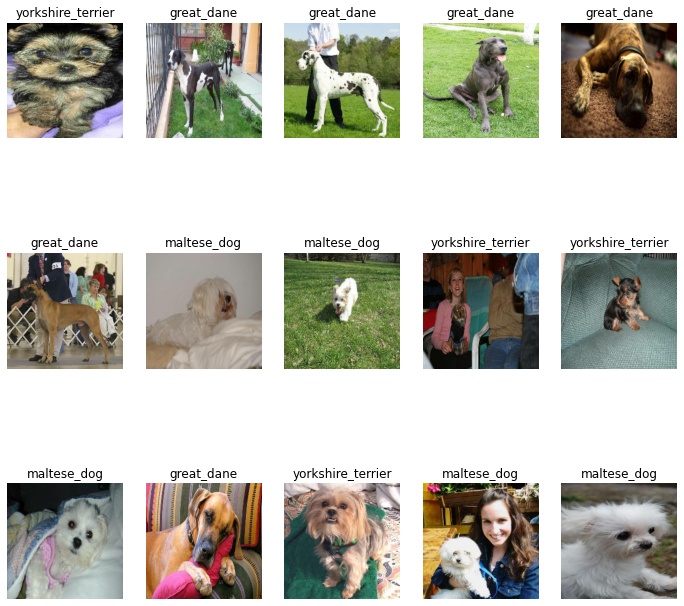

In [14]:
import matplotlib.pyplot as plt

def view_data_batch(images, labels):
  """
  Shows a data batch of images and the labels
  """
  plt.figure(figsize=(12, 12))

  for i in range(15):
    # cretaes 3 rows and 5 columns
    axes = plt.subplot(3, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis("off")

#unbatched the data and turned it into a numpy iterator
x_train, y_train = next(train_data.as_numpy_iterator())

view_data_batch(x_train, y_train)

# Building the model

## Model Setup

In [15]:
# Instantiating the model's input, output, and URL

INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_labels)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

## Create Model Function 

In [16]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):

  # model layer creation 
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax")
  ])   

  # model compilation 
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # model building
  model.build(INPUT_SHAPE)

  return model                      
                               

In [ ]:
model = create_model()
model.summary()

## Model Callbacks

In [19]:
%load_ext tensorboard

import datetime
import os

# tensorboard callback
def create_tb_callback():

  log_path = os.path.join("/content/drive/MyDrive/BreedIdentifier/breedidentifier/logs",
                          datetime.datetime.now().strftime("%m%d%Y-%H%M"))
  
  return tf.keras.callbacks.TensorBoard(log_path)

# prevent overfitting with early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
